https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
data = load_digits().data

In [ ]:
data.shape

(1797, 64)

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
targets = load_digits().target

In [ ]:
targets.shape

(1797,)

In [ ]:
targets[0]

0

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_data, test_data, train_targets, test_targets = train_test_split(data, 
                                                                    targets, 
                                                                    train_size = 0.8, 
                                                                    stratify = targets 
                                                                    )

In [ ]:
train_data.shape

(1437, 64)

In [ ]:
test_data.shape

(360, 64)

In [ ]:
from torch.utils.data import Dataset

In [ ]:
class DigitsDataset(Dataset):
  def __init__(self, data, targets):
    self.data = data
    self.targets = targets

  def __len__(self):
    return len(self.data)

  def __getitem__(self,idx):
    x = self.data[idx]/16
    y = self.targets[idx]

    return x, y


In [ ]:
train_dataset = DigitsDataset(train_data, train_targets)

In [ ]:
test_dataset = DigitsDataset(test_data, test_targets)

In [ ]:
single_item =  test_dataset[0]

In [ ]:
single_item[0]

array([0.    , 0.    , 0.125 , 0.9375, 0.25  , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.6875, 0.8125, 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 1.    , 0.375 , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.1875, 1.    , 0.4375, 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.25  , 1.    , 1.    , 0.9375, 0.3125, 0.    , 0.    ,
       0.    , 0.25  , 1.    , 0.3125, 0.1875, 0.8125, 0.4375, 0.    ,
       0.    , 0.0625, 0.875 , 0.5625, 0.    , 0.5   , 0.8125, 0.    ,
       0.    , 0.    , 0.125 , 0.8125, 1.    , 1.    , 0.5   , 0.    ])

y

In [ ]:
single_item[1]

6

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size = 32, shuffle = True)

In [ ]:
test_dataloader = DataLoader(test_dataset, batch_size  = 32, shuffle = False)

In [ ]:
single_batch = next(iter(test_dataloader))

In [ ]:
single_batch[0].shape

torch.Size([32, 64])

In [ ]:
single_batch[0].max()

tensor(1., dtype=torch.float64)

In [ ]:
single_batch[1].shape

torch.Size([32])

In [ ]:
from torch import nn

In [ ]:
fc = nn.Linear(10,20)

In [ ]:
fc

Linear(in_features=10, out_features=20, bias=True)

In [ ]:
fc.weight

Parameter containing:
tensor([[-0.1022,  0.0197, -0.0141, -0.1006,  0.0420,  0.3151,  0.1247,  0.0364,
         -0.1311, -0.1063],
        [-0.0675,  0.2626,  0.2098,  0.2873, -0.0340, -0.2170,  0.0082, -0.1571,
         -0.1165,  0.2532],
        [ 0.2132, -0.1046, -0.2366, -0.0476, -0.1099,  0.0539, -0.1771, -0.1989,
          0.0990,  0.3051],
        [ 0.0138, -0.1930,  0.0519, -0.1280, -0.1395, -0.0720, -0.1740, -0.0795,
         -0.0852, -0.2454],
        [ 0.1232,  0.2036, -0.0240,  0.1818, -0.0563,  0.3001,  0.0417, -0.2840,
         -0.0710,  0.0959],
        [ 0.0926, -0.1205,  0.2803, -0.2865, -0.1340, -0.0584, -0.0372,  0.2182,
         -0.1726,  0.0591],
        [ 0.0391,  0.1514, -0.2234,  0.0948,  0.2391,  0.0401,  0.2387, -0.0972,
         -0.2523, -0.1083],
        [-0.0029,  0.1835, -0.2427,  0.0803,  0.2280,  0.1116, -0.0961, -0.0650,
         -0.3005, -0.2285],
        [ 0.1264, -0.0091, -0.0805, -0.1743,  0.1450,  0.0802,  0.0169, -0.1112,
          0.0456,  0.2185

In [ ]:
fc.weight.shape

torch.Size([20, 10])

In [ ]:
import torch.nn.functional as F

In [ ]:
from torch import Tensor

In [ ]:
F.softmax(Tensor([1,2,3]), dim=0)

tensor([0.0900, 0.2447, 0.6652])

In [ ]:
class Model(nn.Module):
  def __init__(self, input_size, num_classes):
    super(Model, self).__init__()
    self.fc1 = nn.Linear(input_size, 100) 
    self.fc2 = nn.Linear(100, num_classes)  
    
  def forward(self, x):
    out = self.fc1(x)
    out = F.relu(out) 
    out = self.fc2(out)
    if not self.training:
      out = F.softmax(out, dim=1) 
    return out

In [ ]:
model = Model(64,10)

In [ ]:
ce_loss = nn.CrossEntropyLoss() # <- clasification
mse_loss = nn.MSELoss() # <- regresion

In [ ]:
ce_loss(Tensor([[0.1,0.1,0.8]]), Tensor([[0,0,1]]))

tensor(0.6897)

In [ ]:
mse_loss(Tensor([[0.1,0.1,0.8]]), Tensor([[0,0,1]]))

tensor(0.0200)

In [ ]:
import torch

In [ ]:
x = torch.zeros((2,3), dtype=torch.float32, requires_grad=True)
y = torch.ones((2,3), dtype= torch.float32, requires_grad=True)

In [ ]:
x

tensor([[0., 0., 0.],
        [0., 0., 0.]], requires_grad=True)

In [ ]:
y

tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)

In [ ]:
loss =  ce_loss(x,y)

In [ ]:
loss

tensor(3.2958, grad_fn=<DivBackward1>)

In [ ]:
loss.backward()

In [ ]:
x.grad

tensor([[-2.9802e-08, -2.9802e-08, -2.9802e-08],
        [-2.9802e-08, -2.9802e-08, -2.9802e-08]])

In [ ]:
from torch import optim

In [ ]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=64, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)>

In [ ]:
adam = optim.Adam(model.parameters())

In [ ]:
model = Model(64,10)

adam = optim.Adam(model.parameters())

In [ ]:
model.fc1.weight

Parameter containing:
tensor([[ 0.1134,  0.0179,  0.0113,  ...,  0.0654,  0.0245, -0.0842],
        [-0.0567,  0.0114, -0.1130,  ...,  0.0119,  0.1006,  0.0751],
        [-0.0386,  0.1062, -0.1146,  ...,  0.1069, -0.0744, -0.0748],
        ...,
        [ 0.0198, -0.0197,  0.0585,  ...,  0.0505, -0.0708, -0.1073],
        [-0.1023, -0.0216,  0.0455,  ...,  0.0854,  0.1051,  0.0964],
        [-0.0081,  0.0372,  0.0699,  ...,  0.0612,  0.0635, -0.0468]],
       requires_grad=True)

In [ ]:
y = model(torch.rand(100,64))

In [ ]:
loss = ce_loss(y, torch.ones(100,10))

In [ ]:
loss.backward()

In [ ]:
model.fc1.weight.grad

tensor([[ 0.0044,  0.0036,  0.0040,  ...,  0.0038,  0.0035,  0.0027],
        [-0.0062, -0.0069, -0.0068,  ..., -0.0064, -0.0066, -0.0069],
        [ 0.0026,  0.0032,  0.0025,  ...,  0.0030,  0.0024,  0.0025],
        ...,
        [ 0.0039,  0.0039,  0.0036,  ...,  0.0035,  0.0033,  0.0032],
        [-0.0004, -0.0011, -0.0008,  ..., -0.0011, -0.0013, -0.0009],
        [-0.0055, -0.0058, -0.0054,  ..., -0.0044, -0.0050, -0.0050]])

In [ ]:
adam.step()

In [ ]:
model.fc1.weight

Parameter containing:
tensor([[ 0.1124,  0.0169,  0.0103,  ...,  0.0644,  0.0235, -0.0852],
        [-0.0557,  0.0124, -0.1120,  ...,  0.0129,  0.1016,  0.0761],
        [-0.0396,  0.1052, -0.1156,  ...,  0.1059, -0.0754, -0.0758],
        ...,
        [ 0.0188, -0.0207,  0.0575,  ...,  0.0495, -0.0718, -0.1083],
        [-0.1013, -0.0206,  0.0465,  ...,  0.0864,  0.1061,  0.0974],
        [-0.0071,  0.0382,  0.0709,  ...,  0.0622,  0.0645, -0.0458]],
       requires_grad=True)

In [ ]:
model.fc1.weight.grad

tensor([[ 0.0044,  0.0036,  0.0040,  ...,  0.0038,  0.0035,  0.0027],
        [-0.0062, -0.0069, -0.0068,  ..., -0.0064, -0.0066, -0.0069],
        [ 0.0026,  0.0032,  0.0025,  ...,  0.0030,  0.0024,  0.0025],
        ...,
        [ 0.0039,  0.0039,  0.0036,  ...,  0.0035,  0.0033,  0.0032],
        [-0.0004, -0.0011, -0.0008,  ..., -0.0011, -0.0013, -0.0009],
        [-0.0055, -0.0058, -0.0054,  ..., -0.0044, -0.0050, -0.0050]])

In [ ]:
adam.zero_grad()

In [ ]:
model.fc1.weight.grad

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml("mnist_784")

In [ ]:
import numpy as np

In [ ]:
data = mnist.data.to_numpy()
targets = np.vectorize(lambda x: int(x))(mnist.target.to_numpy())

In [ ]:
data.shape

(70000, 784)

In [ ]:
targets.shape

(70000,)

### 1. Podziel dane na treningowe i testowe
Podziel dane w stosunku 80/20 ze stratyfikacją

In [ ]:
train_data, test_data, train_targets, test_targets = train_test_split(data,
                                                                    targets, 
                                                                    train_size = 0.8, 
                                                                    stratify = targets
                                                                    )

In [ ]:
train_data.shape

(56000, 784)

In [ ]:
test_data.shape

(14000, 784)

In [ ]:
from torch.utils.data import Dataset


In [ ]:
class DigitsDataset(Dataset):
  def __init__(self, data, targets):
    self.data = data
    self.targets = targets

  def __len__(self):
    return len(self.data)

  def __getitem__(self,idx):
    x = self.data[idx]/255
    y = self.targets[idx]

    return x, y


In [ ]:
train_dataset = DigitsDataset(train_data, train_targets)

In [ ]:
test_dataset = DigitsDataset(test_data, test_targets)

In [ ]:
train_dataset[0][0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

y

In [ ]:
train_dataset[0][0].shape

(784,)

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size = 32, shuffle = True)

In [ ]:
test_dataloader = DataLoader(test_dataset, batch_size  = 32, shuffle = False)

In [ ]:
from torch import nn
import torch.nn.functional as F


In [ ]:
class Model(nn.Module):
  def __init__(self, input_size, num_classes):
    super(Model, self).__init__()
    self.fc1 = nn.Linear(input_size, 200)
    self.fc2 = nn.Linear(200, 100)
    self.fc3 = nn.Linear(100, num_classes)

  def forward(self, x):
    out = self.fc1(x)
    out = F.relu(out)
    out = self.fc2(out)
    out = F.relu(out)
    out = self.fc3(out)
    if not self.training:
      out = F.softmax(out, dim=1) 
    return out

In [ ]:
from torch import optim
import torch

In [ ]:
model = Model(784, 10)
optimizer = optim.Adam(model.parameters())
loss_function = nn.CrossEntropyLoss()

In [ ]:
from matplotlib import test


train_losses = []
test_losses = []

for epoch in range(10): 
  
  epoch_train_loss = 0.
  epoch_test_loss = 0.


  for data in train_dataloader: 
    inputs, labels = data 
    optimizer.zero_grad()
    outputs = model.forward(inputs.float())
    loss = loss_function(outputs, labels)

    loss.backward()

    optimizer.step()

    epoch_train_loss += loss.item()

  with torch.no_grad(): #
    for test_data in test_dataloader:
      inputs, labels = test_data 
      outputs = model.forward(inputs.float())

      loss = loss_function(outputs, labels)
      
      epoch_test_loss += loss.item()


  print(f"Epoch {epoch} train loss {epoch_train_loss/len(train_dataloader)}, test_loss {epoch_test_loss/len(test_dataloader)}")
  train_losses.append(epoch_train_loss/len(train_dataloader))
  test_losses.append(epoch_test_loss/len(test_dataloader))

Epoch 0 train loss 0.26331915058514904, test_loss 0.13600770788071634
Epoch 1 train loss 0.10464095574843564, test_loss 0.11119270784574131
Epoch 2 train loss 0.07135654924876456, test_loss 0.08656853755731901
Epoch 3 train loss 0.05342978780803138, test_loss 0.07702398500548778
Epoch 4 train loss 0.039958442356387555, test_loss 0.06825442134177304
Epoch 5 train loss 0.03135536032905968, test_loss 0.07075431821190395
Epoch 6 train loss 0.02659690135676231, test_loss 0.07654162776698577
Epoch 7 train loss 0.024517185405471018, test_loss 0.10437757852427132
Epoch 8 train loss 0.019444634906587974, test_loss 0.1007822674441097
Epoch 9 train loss 0.016954638609114357, test_loss 0.0856227527010581


In [ ]:
import matplotlib.pyplot as plt

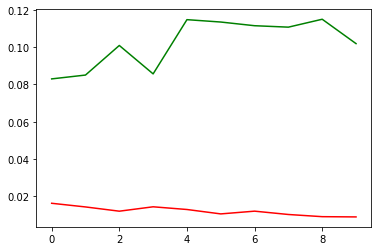

In [ ]:
plt.plot(list(range(10)),train_losses, color="red")
plt.plot(list(range(10)),test_losses, color="green")